In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Current Food
current_food = pd.read_csv('current food.csv')
current_food.head(5)

,item,cost,calories per serving,servings left,week,cost per serving
0,Hot Dogs,6.99,170,9,1,0.436875
1,Hot Dog Buns,2.50,140,4,1,0.312500
2,Blueberry Pie,6.00,400,6,1,0.750000
3,Butter,4.00,100,32,1,0.125000
4,Condiments,10.00,1,1,1,10.000000


In [17]:
# Ate Out
ate_out = pd.read_csv('ate out.csv')
ate_out.head(5)

,item,cost,week
0,boba,10.0,1
1,Sandwiches,0.1,1
2,strip steak,8.0,1
3,pizza,5.0,1
4,Paffles,10.0,1


### Budgeting

Week 1: $1.62 left
Week 2: $91.0 left


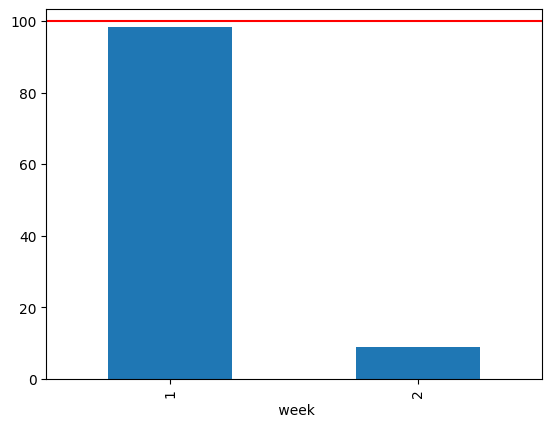

In [18]:
# Concat Current Food and Ate Out
food = pd.concat([current_food, ate_out], ignore_index=True, axis = 0)

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar')
weekly = food.groupby(' week')[' cost'].sum()

# Print Amount Under Budget
budget = 100
for i in range(1, len(weekly)+1):
    result = round(budget - weekly[i], 2)
    print("Week " + str(i) + ": $" + str(result) + " left")

# horizontal line
plt.axhline(y=100, color='r', linestyle='-')

### Calories

In [19]:
food['calories'] = food[' calories per serving'] * food[' servings left']
food.groupby(' week')['calories'].sum().head(5)


 week
1    16771.0
2        0.0
Name: calories, dtype: float64

In [20]:
food.sort_values(by = 'calories', ascending=False).head(10)

,item,cost,calories per serving,servings left,week,cost per serving,calories
7,Rice,6.00,160.0,49.0,1,0.120000,7840.0
3,Butter,4.00,100.0,32.0,1,0.125000,3200.0
2,Blueberry Pie,6.00,400.0,6.0,1,0.750000,2400.0
0,Hot Dogs,6.99,170.0,9.0,1,0.436875,1530.0
1,Hot Dog Buns,2.50,140.0,4.0,1,0.312500,560.0
8,Teriyaki Yakisoba,1.29,400.0,1.0,1,1.290000,400.0
9,Hot Noodles,1.50,400.0,1.0,1,0.750000,400.0
6,Pork Slices,3.00,150.0,2.0,1,0.750000,300.0
5,Brioche Bread,7.00,140.0,1.0,1,1.750000,140.0
4,Condiments,10.00,1.0,1.0,1,10.000000,1.0


day,0,1,2,3,4,5,6
week,,,,,,,
1,NaN,2900.0,1960.0,2070.0,2330.0,2600.0,1800.0
2,2130.0,2000.0,340.0,NaN,NaN,NaN,NaN


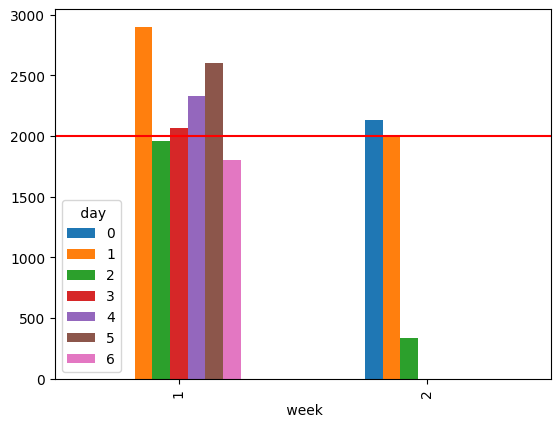

In [21]:
consumption = pd.read_csv('consumption.csv')
consumption.head(5)

import numpy as np
# pivot table of week and day
pivot = pd.pivot_table(consumption, values=' calories', index=[' week'],
                    columns=[' day'], aggfunc=np.sum)

# Plot Bar
pivot.plot(kind='bar')

#horizontal line at 2000
plt.axhline(y=2000, color='r', linestyle='-')

pivot.head(5)